## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mice_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
#one_mouse = mouse_study[mouse_study['Mouse ID'] == 'b128']

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the combined data frame by Drug Regimen
drug_regimen_tumor_volumes = mice_study_data.groupby(['Drug Regimen'])

# Calculate mean of the tumor volumes for each regimen
mean_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].mean()

# Calculate median of the tumor volumes for each regimen
median_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].median()

# Calculate unbiased variance of the tumor volumes for each regimen
var_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].var()

# Calculate standard deviation of the tumor volumes for each regimen
std_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].std()

# Calculate unbiased SEM (standard error of the mean) of the tumor volumes for each regimen
sem_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].sem()

# Save tumor volume statistics to a summary data frame
tumor_volumes_stats_summary = pd.DataFrame( {'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume, 'Variance in Tumor Volume': var_tumor_volume, 'Std Deviation in Tumor Volume': std_tumor_volume, 'SEM for Tumor Volume': sem_tumor_volume} )

# Print tumor volume summary data frame
tumor_volumes_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std Deviation in Tumor Volume,SEM for Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

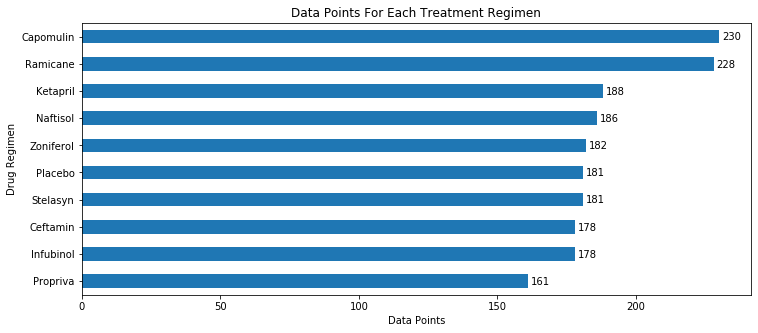

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Get the number of data points for each drug regimen
data_points = drug_regimen_tumor_volumes['Mouse ID'].count()
drug_regimen_data_points = pd.DataFrame({'Data Points': data_points})
drug_regimen_data_points = drug_regimen_data_points.sort_values('Data Points', ascending=False)

# Generate a bar plot using DataFrame.plot()
data_points_axes = drug_regimen_data_points.plot.barh(figsize=(12,5), legend=False)
data_points_axes.set_title('Data Points For Each Treatment Regimen')
data_points_axes.set_xlabel('Data Points')
data_points_axes.set_ylabel('Drug Regimen')
index = 0
for i in data_points_axes.patches:
    # get_x pulls left or right; get_height pushes up or down
    data_points_axes.text(i.get_width()+1, i.get_y()+.38, str(drug_regimen_data_points['Data Points'][index]))
    index += 1
data_points_axes.invert_yaxis()

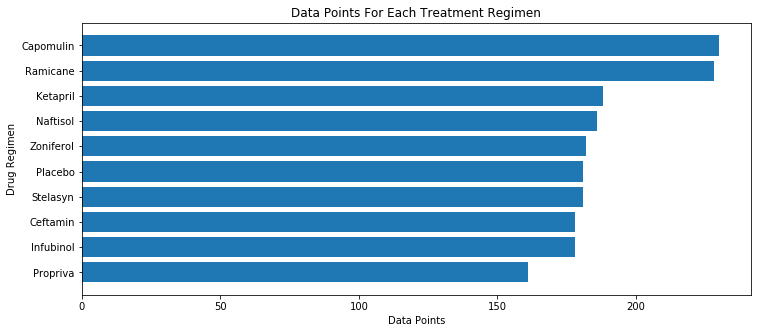

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(drug_regimen_data_points))
drug_regimens = drug_regimen_data_points.index.tolist()
plt.figure(figsize=(12,5))
plt.barh(x_axis, drug_regimen_data_points['Data Points'])
plt.yticks(x_axis, drug_regimens)
plt.title('Data Points For Each Treatment Regimen')
plt.xlabel('Data Points')
plt.ylabel('Drug Regimen')
plt.gca().invert_yaxis()
plt.show()

## Pie plots

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex = mice_study_data['Sex'].value_counts()
mice_sex_type = mice_study_data['Sex'].unique()
mice_sex, mice_sex_type

(Male      958
 Female    935
 Name: Sex, dtype: int64, array(['Male', 'Female'], dtype=object))

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen